In [40]:
import numpy as np
np.random.seed(1337) 
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler, MaxAbsScaler, Normalizer
from keras.models import Sequential
from keras.layers import Dense, Conv1D, BatchNormalization, MaxPooling1D, LeakyReLU, Flatten, Dropout
from keras.callbacks import History, ModelCheckpoint
from keras import backend as K
from keras import metrics
from keras_self_attention import SeqSelfAttention
from keras.utils import custom_object_scope
from sklearn.metrics import confusion_matrix
import keras
import glob
import os
import itertools

In [41]:
os.chdir('/Users/dimitrygrebenyuk/Yandex.Disk.localized/Working/PDF/Refinements/PDF-Cluster-Prediction/pure_prediction/processed/')

In [62]:
data_points = []

with open('/Users/dimitrygrebenyuk/Yandex.Disk.localized/Working/PDF/Refinements/PDF-Cluster-Prediction/pure_prediction/processed/labels.txt', 'w') as labels:
    files = glob.glob('*_processed.gr')
    for f in files:
        df = pd.read_csv(f, usecols=[1], skiprows=1, header=None, delim_whitespace=True, skipfooter=1, engine='python')
        data_points.append(df.values.ravel())
        labels.write(f[0])
        labels.write('\n')
data_points = np.array(data_points)
normalize = Normalizer()
data_points = normalize.fit_transform(data_points)

In [49]:
labels = pd.read_csv("labels.txt", header=None)
labels = labels.values.ravel()

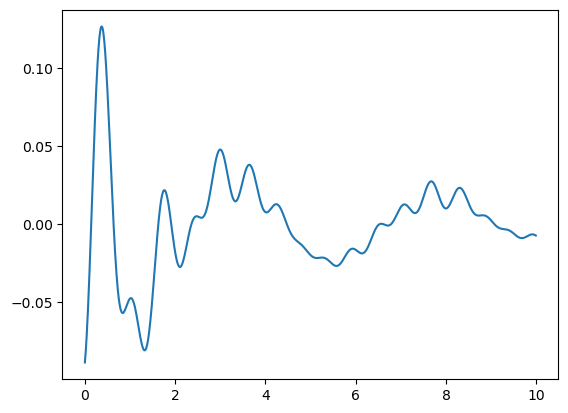

In [50]:
%matplotlib inline
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.plot(np.arange(len(data_points[3,:]))/100, data_points[3,:])

In [61]:
with custom_object_scope({'SeqSelfAttention': SeqSelfAttention}):
    load_model = keras.models.load_model('/Users/dimitrygrebenyuk/Yandex.Disk.localized/Working/PDF/Refinements/PDF-Cluster-Prediction/all_data/best_2-12.hdf5')

In [64]:
y_pred_prob = load_model.predict(data_points)
y_pred = np.argmax(y_pred_prob, axis=1)
for file, prediction in zip(files, y_pred):
    print(f'For file {file} the prediction is {prediction}')
#confusion = confusion_matrix(labels, y_pred)

1/1 [==============================] - 0s 22ms/step
For file 4_KM114_processed.gr the prediction is 4
For file pdf41_CH17sol_60sec_kapton15_processed.gr the prediction is 4
For file 4_KM114r_acc_15reps_1Kapton_processed.gr the prediction is 4
For file 4_DF278_V_acc_15reps_0.5Kapton_processed.gr the prediction is 4


Confusion matrix, without normalization
[[3 0]
 [1 0]]


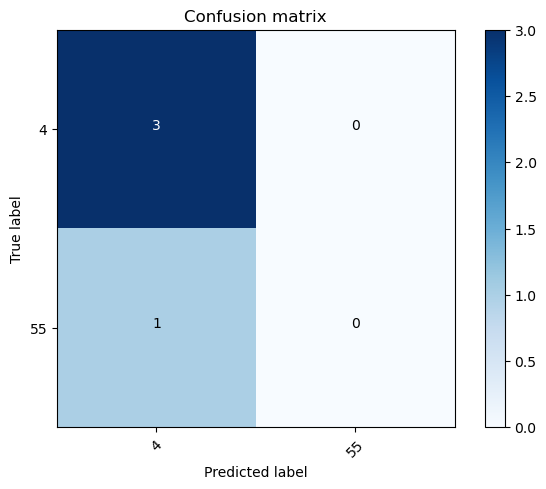

In [53]:
import matplotlib.pyplot as plt

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Plot the confusion matrix
plot_confusion_matrix(confusion, classes = np.unique(labels), title='Confusion matrix', normalize=False)
plt.show()